## Objective

The objectives of this Exploratory Data Analysis (EDA) of the dataset of India are:

1. Narrow down the exploration to 2 states: Chhattisgarh and Odisha (both are adjacent to each other).
2. Why Chhattisgarh has more amount of forests and plantation of Paddy (~aka Rice) as compared to Odisha ?
3. Observe any climate, ecological, soil type differences between the two states.

Observe the position of the 2 states (Chhattisgarh and Odisha in the map below).

<img src="https://www.kindpng.com/picc/m/490-4903357_thumb-image-india-map-29-states-name-hd.png" width="300" height="300" align="center">Image Source: https://www.kindpng.com/imgv/hwRxwob_thumb-image-india-map-29-states-name-hd/</img>


## Some Statistics

Some statistics before we start:

(2014-2015)

* **Forests in Chhattisgarh State**: 45.80% of the available land. [Source](https://fsi.nic.in/isfr19/vol2/isfr-2019-vol-ii-chhattisgarh.pdf)
* **Forests in Madhya Pradesh State**: 28.27% of the available land. [Source](https://fsi.nic.in/isfr19/vol2/isfr-2019-vol-ii-madhya-pradesh.pdf)


## Hypothesis

Before starting the EDA, I would like to make a hypothesis and assert if we were right or not:

_Note: I have lived in Chhattisgarh for more than 18 years, so have some background knowledge about it_

1. Chhattisgarh grows huge amount of rice because of the ample amount of rainfall it receives.
2. The community of Chhattisgarh has protected it's forest land, and hence the development hasn't been that active, as compared to Madhya Pradesh.
3. Chhattisgarh has one of the biggest waterfalls of India, which also contributes to it's tourism. Hence, forests have been protected more than ever.

In [1]:
import geojson
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
import io, requests
import os

## Functions Used 


In [2]:
def get_df(link):    
    """
    Inputs a link to a json/geojson file 
    and returns the dataframe
    """
    try:
        return gpd.read_file(link)
    except Exception as e:
        print(e)
        print("Retrieving the Dataframe from url.")
        req = requests.get(link).content
        return gpd.read_file(io.StringIO(req.decode('utf-8')))


def plot_boundary(df, ax, color='none', edgecolor='black'):
    """
    Plots the administrative boundaries
    """
    df.plot(ax=ax, color=color, edgecolor=edgecolor)

    
def plot_feature(df, ax, column, edgecolor='black', cmap='tab20'):
    """
    Plots the features
    """
    df.plot(ax=ax, column=column, edgecolor=edgecolor, cmap=cmap, legend=True)
    
    
def clip_df(df_complete, df_n):
    """
    Clips the dataset to retain only the necessary data
    """
    return df_complete.clip(df_n)


def column_std(df):
    """
    Standardises column names
    """
    return df.columns.str.lower()

## Datasets

We start-off with downloading the relevant datasets that we'll need. Here is a small gist of what we use, and why:

1. **Administrative Levels:** For visualizations and getting the area of particular forest type.
2. **Climate Zones:** To understand the climate in the forest area, and how it could impact our question: crop-growth and forest percentage.
3. **Soil Cover:** Plays a huge part in forest cover, crop-growth.
4. **Ecological Zones:** Understand the ecological zone of the 2 states in hand.

The final objective would be to _understand the difference_ between the 2 states, and do a survey of their soil, climate and ecological zones.

In [3]:
odisha_bound='Documents/moja-global/administrative_boundary/IND_AL4_Odisha.json' 
cg_bound='Documents/moja-global/administrative_boundary/IND_AL4_Chhattisgarh.json'
ind_bound_all='Documents/moja-global/administrative_boundary/IND_ALL_states_GEZ.json'
ind_bound='Documents/moja-global/administrative_boundary/IND_AL2_India.json'

ds='Documents/moja-global/administrative_boundary/IND_AL2_India_GEZ.json'

In [4]:
#Dataframes of Adminitrative Boundaries files
ind_boundary = get_df(ind_bound)
ind_all = get_df(ind_bound_all)
cg_boundary = get_df(cg_bound)
od_boundary = get_df(odisha_bound)

df_in =get_df(ds)

In [5]:
ind_boundary = get_df(ind_bound)
print(type(ind_boundary))
display(ind_boundary)

<class 'geopandas.geodataframe.GeoDataFrame'>


,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,,India,India,India,,administrative,2,Q668,hi:भारत,2019-10-02 22:56:03,"MULTIPOLYGON (((93.78876 6.90034, 93.78876 6.9..."


##### India has a total of 28 states and 8 union territories. They have been plotted as follows:

## 1. Administrative Boundaries

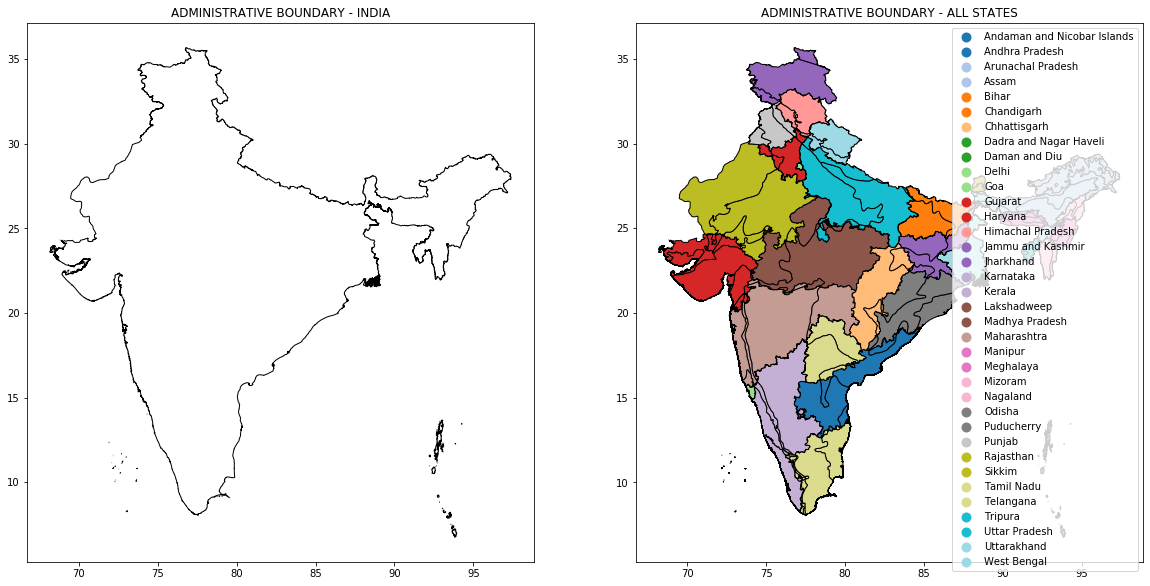

In [6]:
#Plotting the boundaries
ind_boundary  = ind_boundary[['name', 'geometry']]
ind_all = ind_all[['name', 'geometry']]
cg_boundary = cg_boundary[['name', 'geometry']]
od_boundary = cg_boundary[['name', 'geometry']]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.set_title('ADMINISTRATIVE BOUNDARY - INDIA')
ax2.set_title('ADMINISTRATIVE BOUNDARY - ALL STATES')
plot_boundary(ind_boundary, ax1)
plot_feature(ind_all, ax2, 'name')

plt.show()

***This analysis focuses on C.G  and Odisha, both of which are highlighted in the following map of India.***


Chhattisgarh and Odisha are neighboring states located in central and eastern India respectively. The two states share a long border and have a lot in common in terms of geography, culture, and history. They both have rich natural resources, with vast forested areas and mineral deposits. 


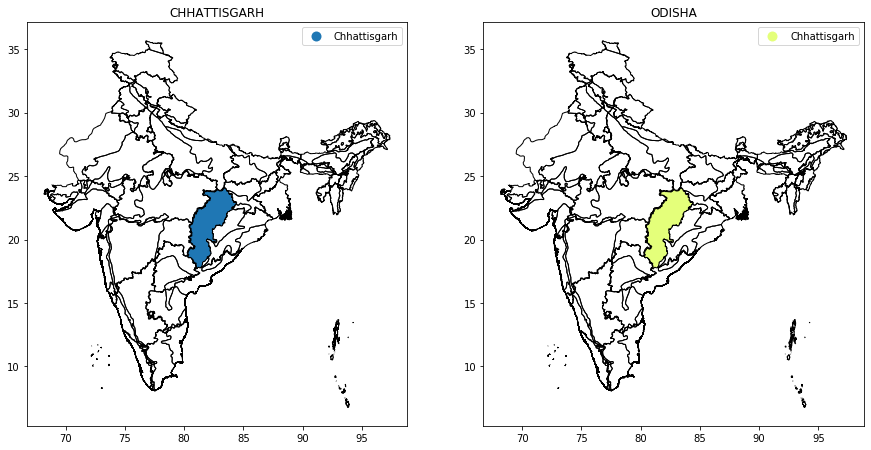

In [7]:
#Identifying Chhattisgarh (C.G) on the map of India

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15 , 8))
ax1.set_title('CHHATTISGARH')
ax2.set_title('ODISHA')
plot_boundary(ind_all, ax1)
plot_feature(cg_boundary, ax1, 'name')
plot_boundary(ind_all, ax2)
plot_feature(od_boundary, ax2, 'name',cmap='Wistia')
plt.show()

## Category of Forests in India

The following categories of forests exist in India:

```python
>>> df_in['gez_name']
0    Subtropical mountain system
1             Subtropical steppe
2      Temperate mountain system
3                Tropical desert
4            Tropical dry forest
5          Tropical moist forest
6       Tropical mountain system
7            Tropical rainforest
8             Tropical shrubland
```

We'll be choosing Tropical Dry Forest, but why? Here are some reasons:

1. I lived in Chhattisgarh (one of the states under comparison here) for ~19 years. I can relate more.
2. Both Odisha and Chhattisgarh has this type of forest in prominence.
3. They are AKA "monsoon forest". Aren't monsoons fun?

In [8]:
df_tropical_dry_forest = df_in[df_in['gez_name'] == 'Tropical dry forest']

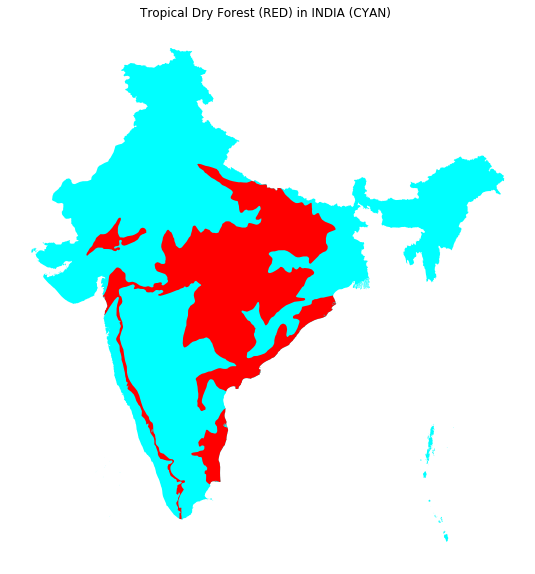

In [9]:
fig, ax = plt.subplots(1, figsize=(20, 10));
ind_boundary.plot(ax=ax,cmap='cool' )
ax.set_title("Tropical Dry Forest (RED) in INDIA (CYAN) ")
df_tropical_dry_forest.plot(ax=ax, color='red')
plt.axis('off')
plt.show()

## Distributing based on Ecological Conditions, Climate Zones and Soil Map

The states in the map which correspond to Tropical Dry Forest are:

1. Chhattisgarh
2. Madhya Pradesh
3. Some parts of Odisha
4. Some parts of Chennai
5. Western Coast
6. Some parts of Gujarat and Rajasthan
7. Bihar
8. Uttar Pradesh

### TROPICAL MOIST FOREST

In [10]:
df_tropical_moist_forest = df_in[df_in['gez_name'] == 'Tropical dry forest']

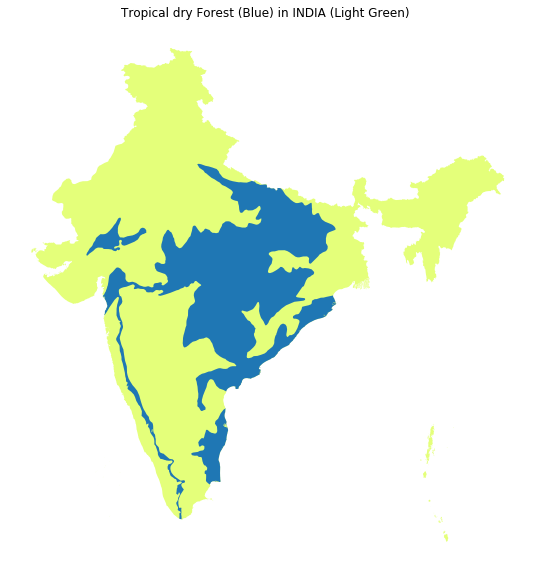

In [66]:
fig, ax = plt.subplots(1, figsize=(20, 10));
ind_boundary.plot(ax=ax,cmap='Wistia' )
ax.set_title("Tropical dry Forest (Blue) in INDIA (Light Green) ")
df_tropical_dry_forest.plot(ax=ax)

plt.axis('off')
plt.show()

### There are several states in India that have tropical moist forests. Some of the states that are known for their tropical moist forests include:

1. Assam
2. Arunachal Pradesh
3. Meghalaya
4. Nagaland
5. Manipur
6. Mizoram
7. Tripura
8. West Bengal
9. Odisha
10. Chhattisgarh
11. Jharkhand
12. Maharashtra


Please note that these states may not have tropical moist forests in their entirety, and the distribution and extent of these forests may vary within each state.

## Climate Zones

We'll start off with classifying based on the climate zones. Let's try to figure out where does Madhya Pradesh and Chhattisgarh Stand.

In [12]:
class Dataset:
    """
    Sample Dataset class which will load + process the dataset.
    
    Note that the process_dataset method is virtual, and needs to be implemented by child classes.
    """
    def __init__(self, path):
        self.path = path
        self.df = None

    def load_dataset(self):
        """
        Returns and saves the dataset after loading into a dataframe.
        
        Will raise an AssertionError if the path (passed during initialization) doesn't exist anymore.
        """
        # First ensure that the path exists!
        path = self.path
        assert os.path.exists(path), f"The given path: {path} does not exist."
        
        # Load the dataset into a GeoDataFrame
        self.df = gpd.read_file(path)
        
        print("Dataset loaded successfully with number of rows: ", len(self.df))
        return self.df

    def _get_index(self, ind):
        return self.df.iloc[ind]

    def __getitem__(self, index):
        assert self.df is not None, "Dataset has not been loaded yet. Please do obj.load_dataset()"
        return self._get_index(index)
    
    def process_dataset(self, *args, **kwargs):
        # virtual method, implement in the child class
        # df_base is common for all, as we will have to clip the dataframe always! (only for this EDA)
        raise NotImplementedError("This class needs to be implemented by the child class.")

In [13]:
class ClimateClass(Dataset):
    def process_dataset(self, *args, **kwargs):
        df_base = kwargs.get("df_reference", None)
        if df_base is None:
            raise ValueError("Expected a df_reference= kwarg, but got none")

        class_names_dict = {
            11: 'Tropical rainforest climate', 12: 'Tropical monsoon climate',
            10: 'Cool Temperature Moist', 0: 'Oceans', 1: 'Warm Temperature Moist',
            9: 'Tropical Montane'
        }

        # Map class names (encoded in numbers) to strings (meaningful)
        self.df.CLASS_NAME = self.df.CLASS_NAME.map(class_names_dict).fillna(self.df.CLASS_NAME)
        
        # Clip the dataframe to get our relevant dataset
        output_df = self.df.clip(df_base)
        return output_df

In [14]:
#climate=get_df('Documents/moja-global/climate/IPCC_ClimateZoneMap_Vector.geojson')
ds_climate = ClimateClass("Documents/moja-global/climate/IPCC_ClimateZoneMap_Vector.geojson")
#output_climate=(df_reference=df_tropical_dry_forest)
df_climate_in = ds_climate.load_dataset()
output_climate = ds_climate.process_dataset(df_reference=df_tropical_dry_forest)

Dataset loaded successfully with number of rows:  26165


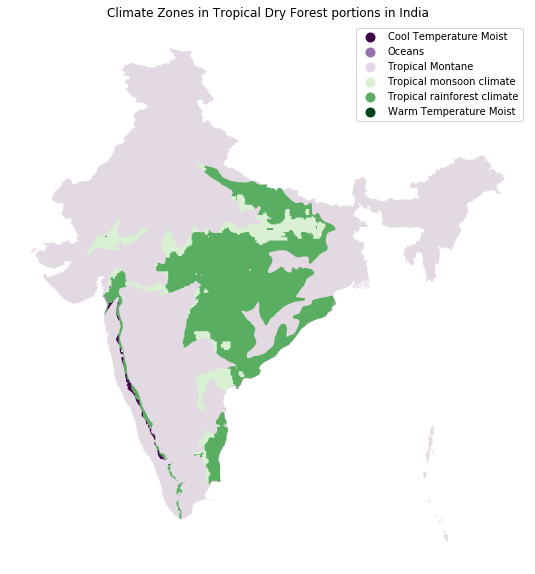

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10));
ind_boundary.plot(ax=ax,cmap='twilight_r',legend=True)
ax.set_title("Climate Zones in Tropical Dry Forest portions in India")
output_climate.plot(ax=ax, column='CLASS_NAME', cmap="PRGn", legend=True)
plt.axis('off')
plt.show()

## Soil Cover

In [16]:
ind_bound_wsr = 'Documents/moja-global/soil/IND_AL2_India_WSR.json'
cg_bound_wsr = 'Documents/moja-global/soil/IND_AL4_Chhattisgarh_WSR.json'
od_bound_wsr = 'Documents/moja-global/soil/IND_AL4_Odisha_WSR.json'

In [17]:
ind_soil_df = get_df(ind_bound_wsr)
cg_soil_df = get_df(cg_bound_wsr)
od_soil_df = get_df(od_bound_wsr)

display(ind_soil_df.head(5))

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,IND,,India,AC,23,Acrisol,2,"MULTIPOLYGON (((92.56884 10.80253, 92.56764 10..."
1,IND,,India,AR,3,Arenosol,2,"MULTIPOLYGON (((69.62064 24.26911, 69.61684 24..."
2,IND,,India,CL,29,Calcisol,2,"MULTIPOLYGON (((68.89517 24.25835, 68.89476 24..."
3,IND,,India,CM,2,Cambisol,2,"MULTIPOLYGON (((88.33736 26.47869, 88.33716 26..."
4,IND,,India,FL,20,Fluvisol,2,"MULTIPOLYGON (((91.37963 23.14395, 91.32592 23..."


In [18]:
display(cg_soil_df.head(13))

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,IND,IN-CT,Chhattisgarh,LX,6,Lixisol,4,"POLYGON ((83.34645 24.09744, 83.34160 24.09830..."
1,IND,IN-CT,Chhattisgarh,VR,5,Vertisol,4,"MULTIPOLYGON (((81.32307 22.52426, 81.31459 22..."


In [19]:
display(od_soil_df.head(13))

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,IND,IN-OR,Odisha,CM,2,Cambisol,4,"POLYGON ((87.37137 21.76454, 87.37006 21.76528..."
1,IND,IN-OR,Odisha,LX,6,Lixisol,4,"MULTIPOLYGON (((86.39402 19.97990, 86.39451 19..."


In [20]:
#Standardising columns
ind_soil_df.columns = column_std(ind_soil_df)
ind_soil_df = ind_soil_df[['ipcc', 'geometry']]

cg_soil_df.columns = column_std(cg_soil_df)
cg_soil_df = cg_soil_df[['ipcc', 'geometry']]

od_soil_df.columns = column_std(od_soil_df)
od_soil_df = od_soil_df[['ipcc', 'geometry']]



In [21]:
print("Soils found in India: ")
print(ind_soil_df['ipcc'])

print("\nSoils found in chhattisgarh: ")
print(cg_soil_df['ipcc'])

Soils found in India: 
0         Acrisol
1        Arenosol
2        Calcisol
3        Cambisol
4        Fluvisol
5         Gleysol
6        Leptosol
7         Luvisol
8         Lixisol
9         Nitisol
10       Vertisol
11    Waterbodies
Name: ipcc, dtype: object

Soils found in chhattisgarh: 
0     Lixisol
1    Vertisol
Name: ipcc, dtype: object


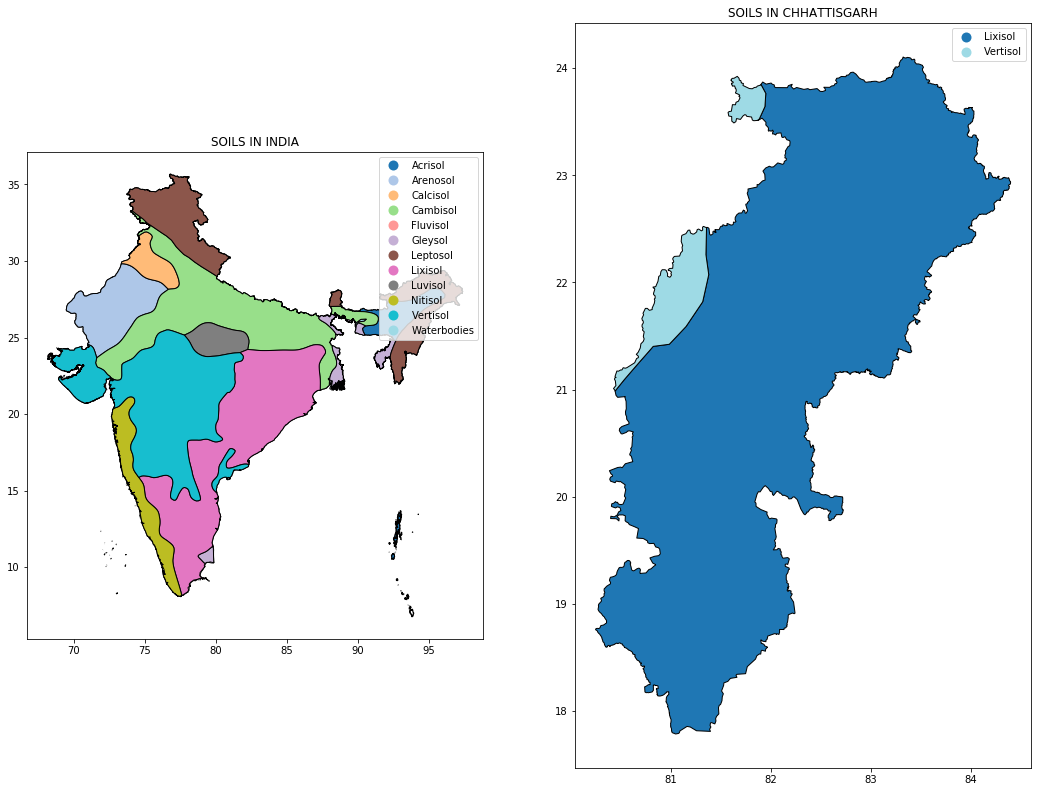

In [22]:
#Plotting the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 14))
ax1.set_title('SOILS IN INDIA')
ax2.set_title('SOILS IN CHHATTISGARH')
plot_boundary(ind_boundary, ax1)
plot_feature(ind_soil_df, ax1, "ipcc")
plot_feature(cg_soil_df, ax2, "ipcc")

plt.show()

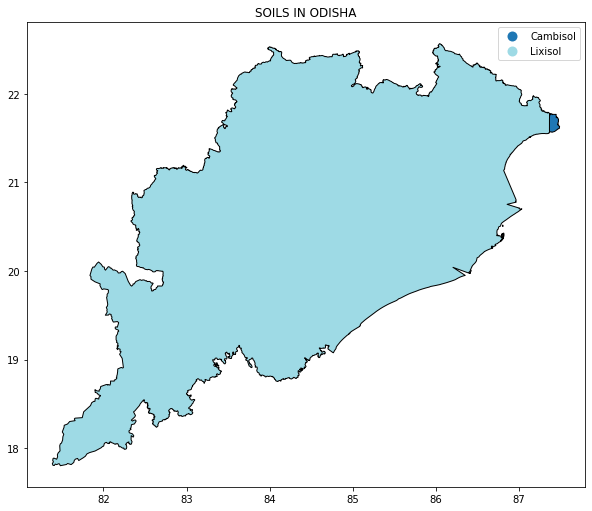

In [23]:

fig, (ax) = plt.subplots(1, figsize=(10, 12))
ax.set_title('SOILS IN ODISHA')

plot_feature(od_soil_df, ax, "ipcc")

plt.show()

### Function 

In [26]:
class SoilClass(Dataset):
    def process_dataset(self, *args, **kwargs):
        df_base = kwargs.get("df_reference", None)
        if df_base is None:
            raise ValueError("Expected a df_reference= kwarg, but got none")
        output_df = self.df.clip(df_base)
        return output_df

In [30]:

ds_soil =SoilClass("Documents/moja-global/soil/World_Soil_Resources_wgs84.geojson")
df_soil_in = ds_soil.load_dataset()
output_soil = ds_soil.process_dataset(df_reference=df_tropical_dry_forest)

Dataset loaded successfully with number of rows:  33


In [31]:
output_soil

,SNAME,IPCC,geometry
23,NT,Nitisol,"MULTIPOLYGON (((73.62051 20.91278, 73.70982 20..."
22,LX,Lixisol,"MULTIPOLYGON (((79.42670 18.35281, 79.54525 18..."
31,VR,Vertisol,"MULTIPOLYGON (((80.66313 17.26652, 80.72675 17..."
3,AR,Arenosol,"POLYGON ((73.53213 25.01565, 73.45617 24.92134..."
21,LV,Luvisol,"POLYGON ((82.03328 25.33364, 82.12821 25.25873..."
8,CM,Cambisol,"MULTIPOLYGON (((71.73193 23.74331, 71.83406 23..."
14,GL,Gleysol,"MULTIPOLYGON (((79.84034 11.21278, 79.84840 10..."


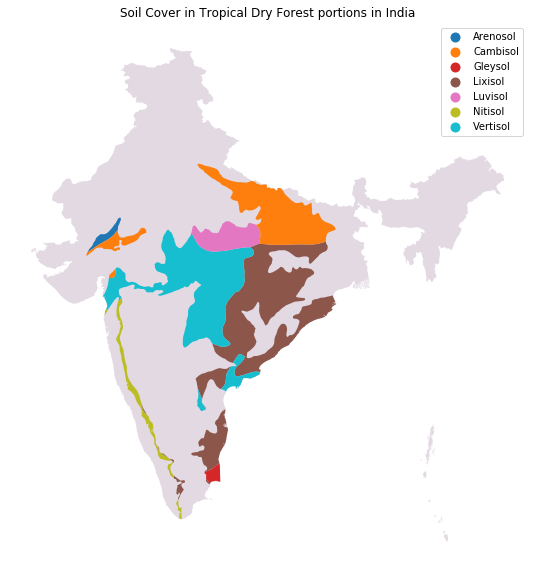

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10));
ind_boundary.plot(ax=ax, cmap='twilight_r', legend=True)
ax.set_title("Soil Cover in Tropical Dry Forest portions in India")
output_soil.plot(ax=ax,column='IPCC',legend=True)
plt.axis('off')
plt.show()

**Analysis**:

From the above plot, it's clear that soil cover/type is almost same between the 2 states. **Chhattisgarh as well as odisha both  has Lixisol**

From [this](https://www.britannica.com/science/Lixisol) link on Lixisol:

> Their age and mineralogy have led to low levels of plant nutrients and a high erodibility, making agriculture possible only with frequent fertilizer applications, minimum tillage, and careful erosion control

High erodibility is a consequence of either high rain or high storms. Chhattisgarh and Odisha has high rain, and for this reason, Lixisol is prominent in that area.

## Ecological Zones

Let's study the ecological zones for the area we selected before.

In [40]:
class EcologicalClass(Dataset):
    def process_dataset(self, *args, **kwargs):
        df_base = kwargs.get("df_reference", None)
        if df_base is None:
            raise ValueError("Expected a df_reference= kwarg, but got none")
        output_df = self.df.clip(df_base)
        return output_df

In [50]:
ds_ecological_zone = EcologicalClass("Documents/moja-global/ecological_zone/IND_ALL_states_GEZ.json")

df_eco_in = ds_ecological_zone.load_dataset()

Dataset loaded successfully with number of rows:  95


In [53]:
df_eco_in

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,IND,IN-AR,Arunachal Pradesh,Subtropical mountain system,25,SM,4,"MULTIPOLYGON (((93.38087 27.46374, 93.44117 27..."
1,IND,IN-HR,Haryana,Subtropical mountain system,25,SM,4,"POLYGON ((77.15470 30.69233, 77.15157 30.69421..."
2,IND,IN-HP,Himachal Pradesh,Subtropical mountain system,25,SM,4,"POLYGON ((78.39507 32.53051, 78.39750 32.52567..."
3,IND,IN-JK,Jammu and Kashmir,Subtropical mountain system,25,SM,4,"POLYGON ((78.26877 34.63843, 78.26571 34.63931..."
4,IND,IN-SK,Sikkim,Subtropical mountain system,25,SM,4,"POLYGON ((88.88731 27.26773, 88.88787 27.26796..."
...,...,...,...,...,...,...,...,...
90,IND,IN-PB,Punjab,Tropical shrubland,14,TBSh,4,"MULTIPOLYGON (((75.33556 32.32408, 75.32969 32..."
91,IND,IN-RJ,Rajasthan,Tropical shrubland,14,TBSh,4,"MULTIPOLYGON (((73.38986 23.76908, 73.39804 23..."
92,IND,IN-TN,Tamil Nadu,Tropical shrubland,14,TBSh,4,"MULTIPOLYGON (((77.55412 8.07834, 77.55416 8.0..."
93,IND,IN-TG,Telangana,Tropical shrubland,14,TBSh,4,"MULTIPOLYGON (((80.82679 17.05185, 80.84857 17..."


In [58]:
df2 = df_eco_in['gez_name'].drop_duplicates(keep='first')
print(df2)

0     Subtropical mountain system
6              Subtropical steppe
7       Temperate mountain system
8                 Tropical desert
12            Tropical dry forest
30          Tropical moist forest
51       Tropical mountain system
62            Tropical rainforest
80             Tropical shrubland
Name: gez_name, dtype: object


In [64]:

output_eco = ds_ecological_zone.process_dataset(df_reference=df_tropical_dry_forest)

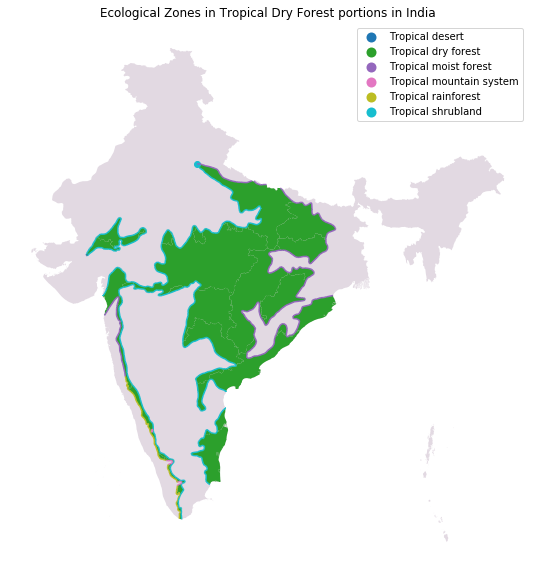

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10));
ind_boundary.plot(ax=ax,cmap='twilight_r', legend=True)
ax.set_title("Ecological Zones in Tropical Dry Forest portions in India")
output_eco.plot(ax=ax, column='gez_name', legend=True)
plt.axis('off')
plt.show()

**Analysis**

From the figure above, looks like Odisha and Chhattisgarh both come in the same Ecological Zones. So this can not be a reason of the difference.

## Final Analysis

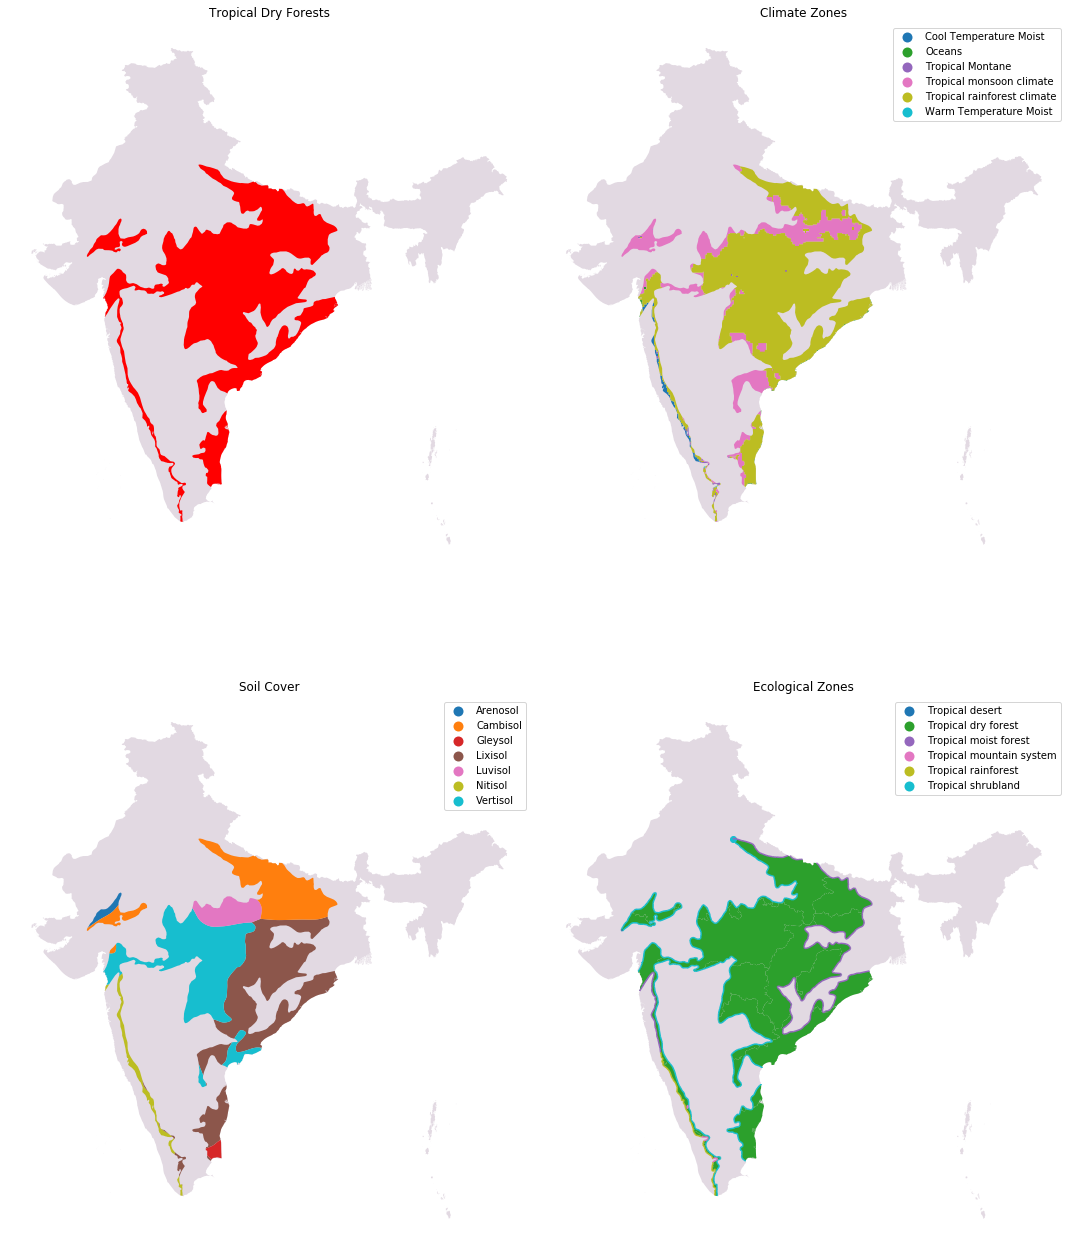

In [79]:


fig, ax = plt.subplots(2, 2, figsize=(15, 20))

for i in range(2):
    for j in range(2):
        ind_boundary.plot(figsize=(20, 10),cmap='twilight_r', ax=ax[i][j])
        ax[i][j].axis('off')


df_tropical_dry_forest.plot(ax=ax[0][0], color='red')
output_climate.plot(ax=ax[0][1], column='CLASS_NAME', legend=True)
output_soil.plot(ax=ax[1][0], column='IPCC', legend=True)
output_eco.plot(ax=ax[1][1], column='gez_name', legend=True)

ax[0][0].set_title("Tropical Dry Forests")
ax[0][1].set_title("Climate Zones")
ax[1][0].set_title("Soil Cover")
ax[1][1].set_title("Ecological Zones")



plt.tight_layout()
plt.show()